# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_min']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | petropavlovsk-kamchatsky
Processing Record 2 of Set 1 | new norfolk
Processing Record 3 of Set 1 | outjo
Processing Record 4 of Set 1 | lindi
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | chasse-sur-rhone
Processing Record 7 of Set 1 | san patricio
Processing Record 8 of Set 1 | belyy yar
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | lihue
Processing Record 11 of Set 1 | la ronge
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | argo
Processing Record 14 of Set 1 | gueltat zemmour
City not found. Skipping...
Processing Record 15 of Set 1 | vadso
Processing Record 16 of Set 1 | angaur state
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | st. john's
Processing Record 19 of Set 1 | lata
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | rongelap
Processing Record 22 of Set 1 | kamina
Proce

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          592
Lat           592
Lng           592
Max Temp      592
Humidity      592
Cloudiness    592
Wind Speed    592
Country       592
Date          592
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,petropavlovsk-kamchatsky,53.0452,158.6483,266.48,79,75,2.00,RU,1733435656
1,new norfolk,-42.7826,147.0587,290.88,48,45,1.33,AU,1733435658
2,outjo,-20.1167,16.1500,294.34,39,5,5.35,NA,1733435659
3,lindi,-10.0000,39.7167,297.84,92,88,0.68,TZ,1733435660
4,tiksi,71.6872,128.8694,247.85,97,63,3.16,RU,1733435661


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,petropavlovsk-kamchatsky,53.0452,158.6483,266.48,79,75,2.00,RU,1733435656
1,new norfolk,-42.7826,147.0587,290.88,48,45,1.33,AU,1733435658
2,outjo,-20.1167,16.1500,294.34,39,5,5.35,NaN,1733435659
3,lindi,-10.0000,39.7167,297.84,92,88,0.68,TZ,1733435660
4,tiksi,71.6872,128.8694,247.85,97,63,3.16,RU,1733435661


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

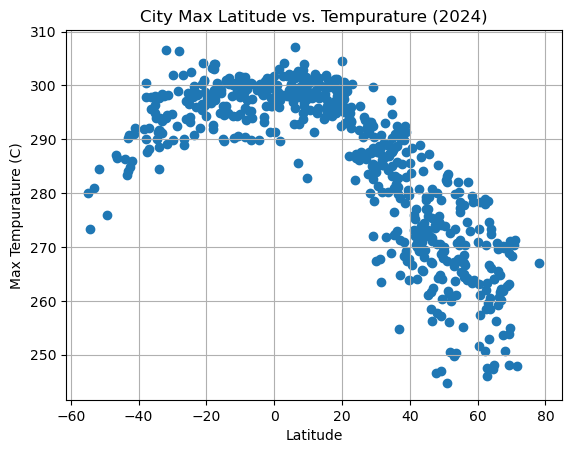

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Max Tempurature (C)')
plt.title('City Max Latitude vs. Tempurature (2024)')
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

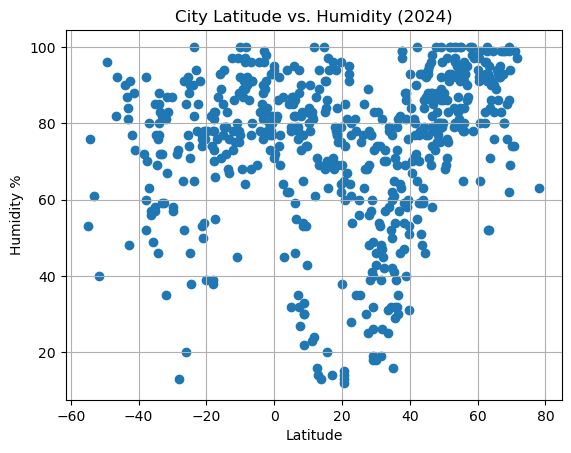

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('City Latitude vs. Humidity (2024)')
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

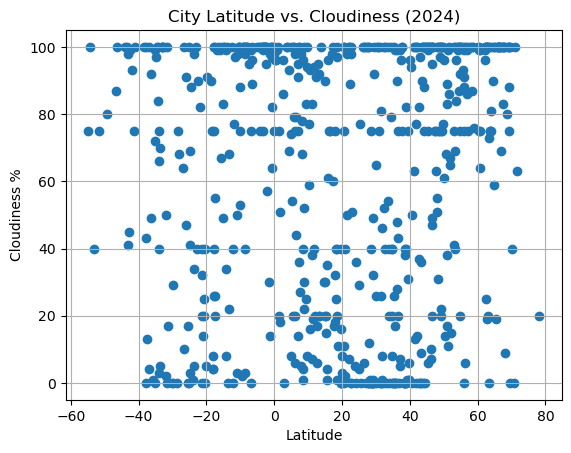

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('City Latitude vs. Cloudiness (2024)')
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

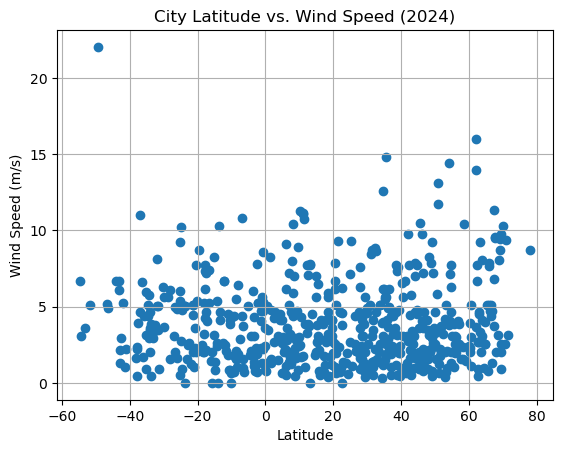

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2024)')
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
(slope,intercept,rvalue,pvalue,std) = linregress(city_data_df['Lat'],city_data_df['Max Temp'])
regress_values = city_data_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.plot(line_eq,regress_values,'r-')
plt.annotate(line_eq,(0,0),fontsize=15,color="red")

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,petropavlovsk-kamchatsky,53.0452,158.6483,266.48,79,75,2.00,RU,1733435656
4,tiksi,71.6872,128.8694,247.85,97,63,3.16,RU,1733435661
5,chasse-sur-rhone,45.5834,4.7982,279.30,71,100,1.03,FR,1733435663
6,san patricio,28.0170,-97.5169,291.12,78,100,6.28,US,1733435664
7,belyy yar,53.6039,91.3903,261.09,92,84,1.00,RU,1733435665


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,new norfolk,-42.7826,147.0587,290.88,48,45,1.33,AU,1733435658
2,outjo,-20.1167,16.1500,294.34,39,5,5.35,NaN,1733435659
3,lindi,-10.0000,39.7167,297.84,92,88,0.68,TZ,1733435660
20,kamina,-8.7386,24.9906,290.33,97,98,1.87,CD,1733435683
22,port-aux-francais,-49.3500,70.2167,275.95,96,80,22.04,TF,1733435686


###  Temperature vs. Latitude Linear Regression Plot

Text(0.5, 1.0, 'City Max Latitude vs. Tempurature (2024)')

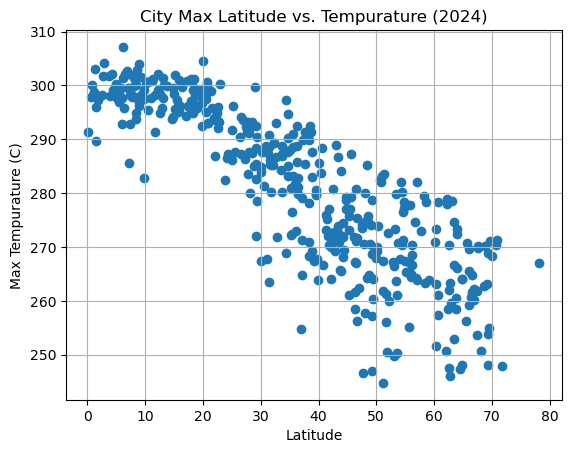

In [18]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Max Tempurature (C)')
plt.title('City Max Latitude vs. Tempurature (2024)')

Text(0.5, 1.0, 'City Max Latitude vs. Tempurature (2024)')

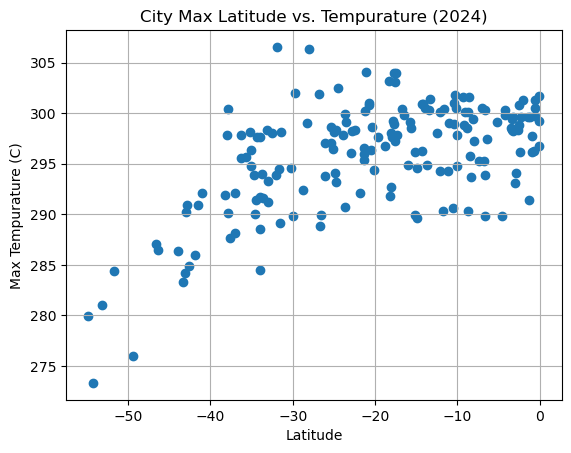

In [19]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Max Tempurature (C)')
plt.title('City Max Latitude vs. Tempurature (2024)')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE